#End-to-End Loan Eligibility Classification

The goal of this project will be to determine loan eligiblity based on a number of features. The intention is to go through all necessary steps of a machine learning classification problem from start to finish.

# Model Selection and Evaluation on Training Set

In [ ]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

In [ ]:
pipelines = {
    'SGD Classifier': make_pipeline(preprocessing,
                                    SGDClassifier(random_state=42)),
    'Logistic Regression': make_pipeline(preprocessing,
                                         LogisticRegression(max_iter=1000,
                                         random_state=42)),
    'XGBoost Classifier': make_pipeline(preprocessing,
                                         xgb.XGBClassifier(random_state=42)),
    'LightGBM Classifier': make_pipeline(preprocessing,
                                          lgb.LGBMClassifier(verbosity=-1,
                                                             random_state=42)),
    'CatBoost Classifier': make_pipeline(preprocessing,
                                          CatBoostClassifier(verbose=0,
                                                             random_state=42,))
}

SGD Classifier Report: 
              precision    recall  f1-score   support

           0       0.94      0.91      0.93     28010
           1       0.72      0.79      0.75      7990

    accuracy                           0.89     36000
   macro avg       0.83      0.85      0.84     36000
weighted avg       0.89      0.89      0.89     36000

Average SGD Classifier CV Score: 0.886



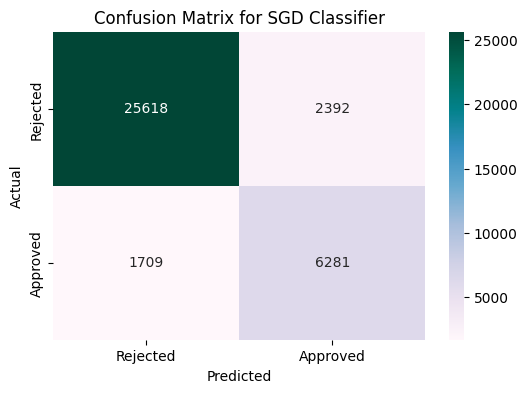



Logistic Regression Report: 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     28010
           1       0.75      0.76      0.76      7990

    accuracy                           0.89     36000
   macro avg       0.84      0.84      0.84     36000
weighted avg       0.89      0.89      0.89     36000

Average Logistic Regression CV Score: 0.891



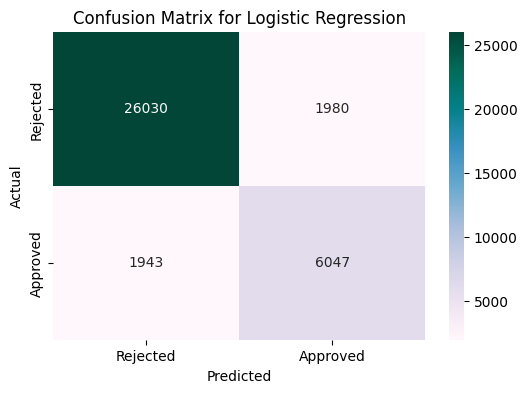



XGBoost Classifier Report: 
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     28010
           1       0.88      0.80      0.84      7990

    accuracy                           0.93     36000
   macro avg       0.91      0.88      0.90     36000
weighted avg       0.93      0.93      0.93     36000

Average XGBoost Classifier CV Score: 0.931



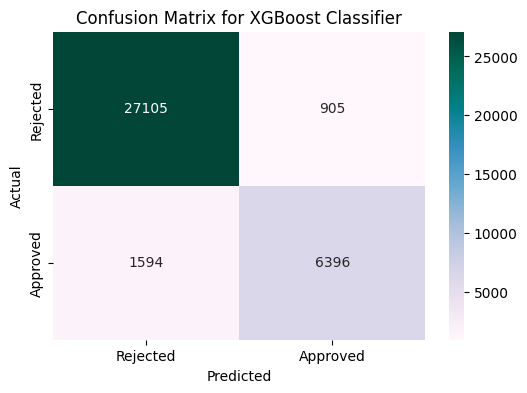



LightGBM Classifier Report: 
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     28010
           1       0.89      0.79      0.83      7990

    accuracy                           0.93     36000
   macro avg       0.91      0.88      0.90     36000
weighted avg       0.93      0.93      0.93     36000

Average LightGBM Classifier CV Score: 0.931



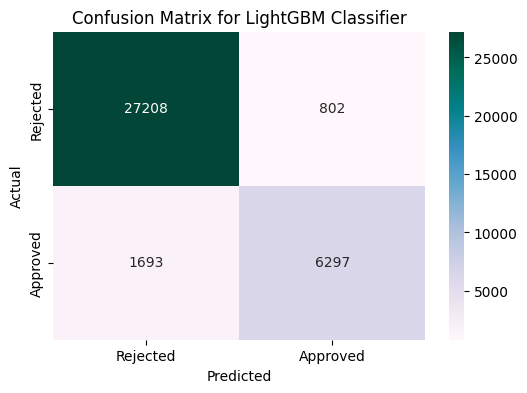



CatBoost Classifier Report: 
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     28010
           1       0.89      0.79      0.83      7990

    accuracy                           0.93     36000
   macro avg       0.92      0.88      0.90     36000
weighted avg       0.93      0.93      0.93     36000

Average CatBoost Classifier CV Score: 0.931



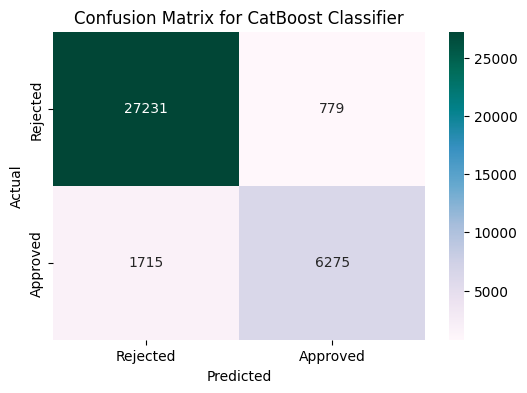



Model Performance Table:


,Model,Accuracy
0,SGD Classifier,0.886083
1,Logistic Regression,0.891028
2,XGBoost Classifier,0.930583
3,LightGBM Classifier,0.930694
4,CatBoost Classifier,0.930722


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict

results = []

for name, model in pipelines.items():
  model.fit(loan_data, loan_labels)
  scores = cross_val_score(model, loan_data, loan_labels, cv=3,
                           scoring='accuracy')
  y_pred = cross_val_predict(model, loan_data, loan_labels, cv=3)
  print(f'{name} Report: \n{classification_report(loan_labels, y_pred)}')
  print(f'Average {name} CV Score: {scores.mean():.3f}\n')
  cm = confusion_matrix(loan_labels, y_pred)
  accuracy = accuracy_score(loan_labels, y_pred)
  results.append({'Model': name, 'Accuracy':accuracy})

  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='PuBuGn',
                xticklabels=['Rejected', 'Approved'],
                yticklabels=['Rejected', 'Approved'])
  plt.title(f'Confusion Matrix for {name}')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  print("\n" + "="*70 + "\n")

results_df = pd.DataFrame(results)

print("Model Performance Table:")
display(results_df)